In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
data = pd.read_csv('C:\\Users\\Skyline\\Credit Risk Probability Model\\data\\raw\\data.csv')
variable_defs = pd.read_csv('C:\\Users\\Skyline\\Credit Risk Probability Model\\data\\raw\\Xente_Variable_Definitions.csv')

In [3]:
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nVariable Definitions:")
print(variable_defs)

Dataset Shape: (95662, 16)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 

In [4]:
data['TransactionStartTime'] = pd.to_datetime(data['TransactionStartTime'])
data['TransactionHour'] = data['TransactionStartTime'].dt.hour
data['TransactionDay'] = data['TransactionStartTime'].dt.day
data['TransactionMonth'] = data['TransactionStartTime'].dt.month
data['TransactionYear'] = data['TransactionStartTime'].dt.year

In [5]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
TransactionHour         0
TransactionDay          0
TransactionMonth        0
TransactionYear         0
dtype: int64


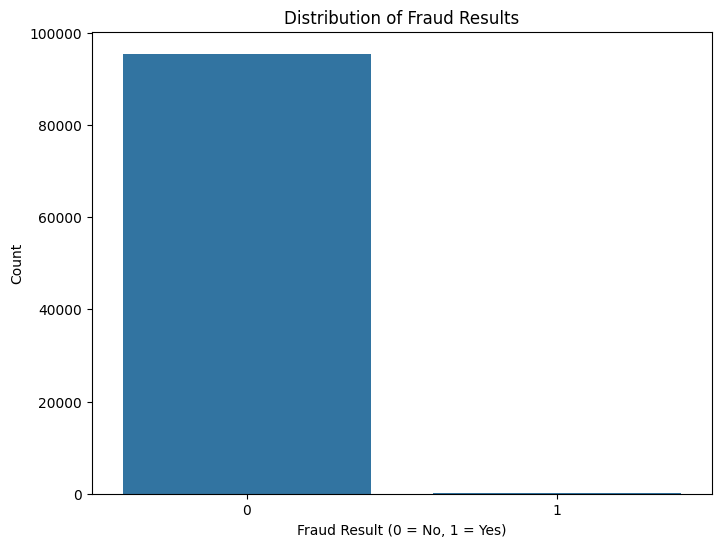

In [6]:
# Explore FraudResult distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudResult', data=data)
plt.title('Distribution of Fraud Results')
plt.xlabel('Fraud Result (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

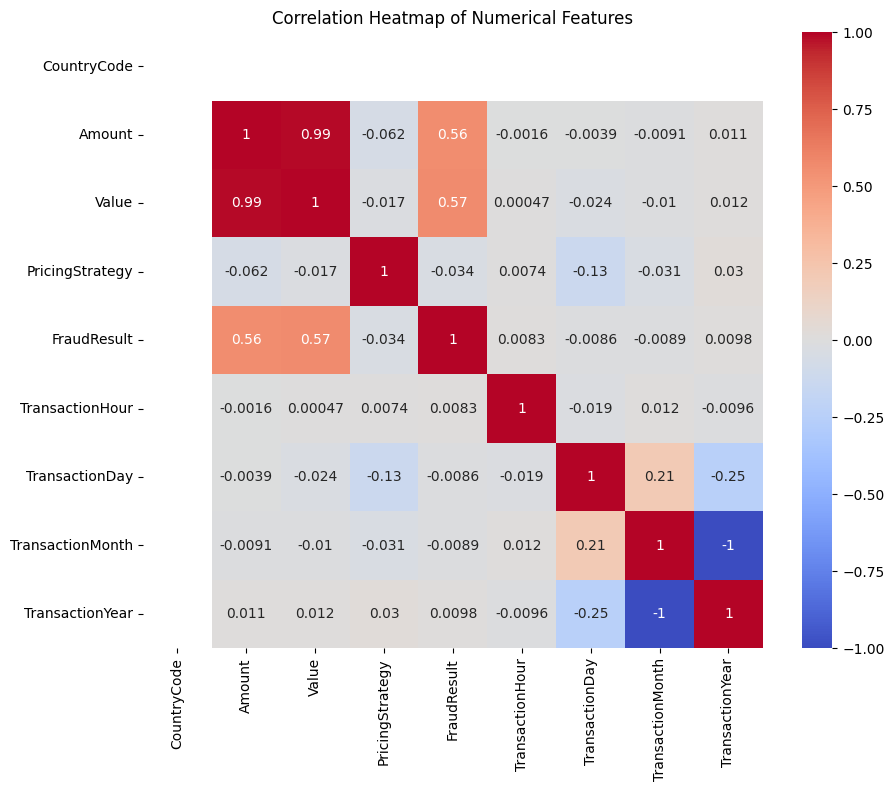

In [7]:
# Correlation heatmap for numerical features
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [8]:
# Group by PricingStrategy and FraudResult
fraud_by_strategy = pd.crosstab(data['PricingStrategy'], data['FraudResult'], normalize='index') * 100
print("\nPercentage of Fraud by Pricing Strategy:")
print(fraud_by_strategy)


Percentage of Fraud by Pricing Strategy:
FraudResult              0         1
PricingStrategy                     
0                90.649351  9.350649
1                99.625067  0.374933
2                99.825919  0.174081
4                99.918891  0.081109


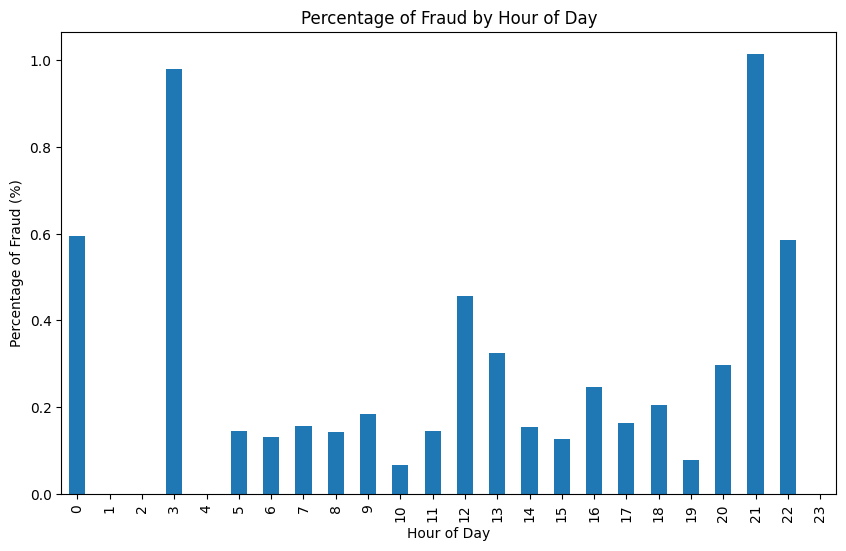

In [9]:

# Analyze time-based fraud patterns
fraud_by_hour = data.groupby('TransactionHour')['FraudResult'].mean() * 100
plt.figure(figsize=(10, 6))
fraud_by_hour.plot(kind='bar')
plt.title('Percentage of Fraud by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Fraud (%)')
plt.show()


In [10]:
# Save exploratory findings to a CSV with absolute path
data[['TransactionStartTime', 'PricingStrategy', 'FraudResult', 'TransactionHour', 'TransactionDay']].to_csv('C:\\Users\\Skyline\\Credit Risk Probability Model\\data\\processed\\exploratory_summary.csv', index=False)